In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

In [2]:
dataframe = pd.read_excel("C:\\Users\\shiri\\DoctorVisits.xlsx")

In [3]:
dataframe

,Unnamed: 0,visits,gender,age,income,illness,reduced,health,private,freepoor,freerepat,nchronic,lchronic
0,1,1,female,0.19,0.55,1,4,1,yes,no,no,no,no
1,2,1,female,0.19,0.45,1,2,1,yes,no,no,no,no
2,3,1,male,0.19,0.90,3,0,0,no,no,no,no,no
3,4,1,male,0.19,0.15,1,0,0,no,no,no,no,no
4,5,1,male,0.19,0.45,2,5,1,no,no,no,yes,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5185,5186,0,female,0.22,0.55,0,0,0,no,no,no,no,no
5186,5187,0,male,0.27,1.30,0,0,1,no,no,no,no,no
5187,5188,0,female,0.37,0.25,1,0,1,no,no,yes,no,no
5188,5189,0,female,0.52,0.65,0,0,0,no,no,no,no,no


In [4]:
dataframe.head()

,Unnamed: 0,visits,gender,age,income,illness,reduced,health,private,freepoor,freerepat,nchronic,lchronic
0,1,1,female,0.19,0.55,1,4,1,yes,no,no,no,no
1,2,1,female,0.19,0.45,1,2,1,yes,no,no,no,no
2,3,1,male,0.19,0.90,3,0,0,no,no,no,no,no
3,4,1,male,0.19,0.15,1,0,0,no,no,no,no,no
4,5,1,male,0.19,0.45,2,5,1,no,no,no,yes,no


the first 5 records of the data set


In [5]:
dataframe.tail()

,Unnamed: 0,visits,gender,age,income,illness,reduced,health,private,freepoor,freerepat,nchronic,lchronic
5185,5186,0,female,0.22,0.55,0,0,0,no,no,no,no,no
5186,5187,0,male,0.27,1.30,0,0,1,no,no,no,no,no
5187,5188,0,female,0.37,0.25,1,0,1,no,no,yes,no,no
5188,5189,0,female,0.52,0.65,0,0,0,no,no,no,no,no
5189,5190,0,male,0.72,0.25,0,0,0,no,no,yes,no,no


the last 5 records of the dataset

In [6]:
dataframe.shape


(5190, 13)

There are 5190 rows and 13 columns

In [7]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5190 entries, 0 to 5189
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  5190 non-null   int64  
 1   visits      5190 non-null   int64  
 2   gender      5190 non-null   object 
 3   age         5190 non-null   float64
 4   income      5190 non-null   float64
 5   illness     5190 non-null   int64  
 6   reduced     5190 non-null   int64  
 7   health      5190 non-null   int64  
 8   private     5190 non-null   object 
 9   freepoor    5190 non-null   object 
 10  freerepat   5190 non-null   object 
 11  nchronic    5190 non-null   object 
 12  lchronic    5190 non-null   object 
dtypes: float64(2), int64(5), object(6)
memory usage: 527.2+ KB


it shows the information about the entire dataframe including the number of null values , data type of each column , and the memory usage

#  Data Preprocessing


Data preprocessing involves cleaning, transforming, and organizing raw data to improve its quality and prepare it for analysis or machine learning tasks. It includes steps such as handling missing values, removing outliers, feature selection, feature engineering, data integration, data encoding, and data splitting.

### visualize if there are any null values or missing  values

<Axes: >

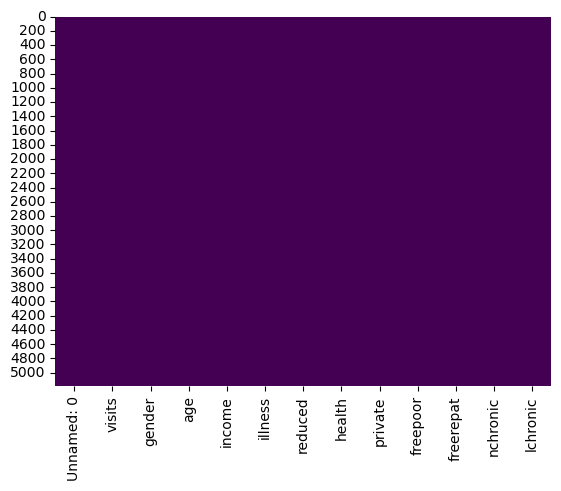

In [8]:
sns.heatmap(dataframe.isnull(),cbar= False,cmap ='viridis')

the above dataset does not have any null values or missing data

In [9]:
dataframe.age

0       0.19
1       0.19
2       0.19
3       0.19
4       0.19
        ... 
5185    0.22
5186    0.27
5187    0.37
5188    0.52
5189    0.72
Name: age, Length: 5190, dtype: float64

In the provided dataset, the 'age' column initially contains age values represented as floating-point numbers. To transform these values into a more appropriate and interpretable format, we convert them to a standard age representation.

In [10]:


dataframe['age'] = dataframe['age'] * 100


In [11]:
dataframe.age

0       19.0
1       19.0
2       19.0
3       19.0
4       19.0
        ... 
5185    22.0
5186    27.0
5187    37.0
5188    52.0
5189    72.0
Name: age, Length: 5190, dtype: float64

In [12]:
dataframe['age'] = dataframe['age'].astype(int)

In [13]:
dataframe.age

0       19
1       19
2       19
3       19
4       19
        ..
5185    22
5186    27
5187    37
5188    52
5189    72
Name: age, Length: 5190, dtype: int32

In [14]:
dataframe['nchronic'].unique()

array(['no', 'yes'], dtype=object)

In [15]:
dataframe['lchronic'].unique()

array(['no', 'yes'], dtype=object)

In [16]:

dataframe['private'] = dataframe['private'].replace({'yes': 1, 'no': 0})


In [17]:
dataframe.private

0       1
1       1
2       0
3       0
4       0
       ..
5185    0
5186    0
5187    0
5188    0
5189    0
Name: private, Length: 5190, dtype: int64

In [18]:

dataframe['freepoor'] = dataframe['freepoor'].replace({'yes': 1, 'no': 0})


In [19]:
dataframe['freerepat'] = dataframe['freerepat'].replace({'yes': 1, 'no': 0})

In [20]:
dataframe['nchronic'] = dataframe['nchronic'].replace({'yes': 1, 'no': 0})

In [21]:
dataframe['lchronic'] = dataframe['lchronic'].replace({'yes': 1, 'no': 0})

the columns nchronic , lchronic , private , freepoor freerepat coints the data in a categorical form i.e 'yes' and 'no' converted this into numerical format which represent yes :1 & no : 0 

In [22]:
dataframe

,Unnamed: 0,visits,gender,age,income,illness,reduced,health,private,freepoor,freerepat,nchronic,lchronic
0,1,1,female,19,0.55,1,4,1,1,0,0,0,0
1,2,1,female,19,0.45,1,2,1,1,0,0,0,0
2,3,1,male,19,0.90,3,0,0,0,0,0,0,0
3,4,1,male,19,0.15,1,0,0,0,0,0,0,0
4,5,1,male,19,0.45,2,5,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5185,5186,0,female,22,0.55,0,0,0,0,0,0,0,0
5186,5187,0,male,27,1.30,0,0,1,0,0,0,0,0
5187,5188,0,female,37,0.25,1,0,1,0,0,1,0,0
5188,5189,0,female,52,0.65,0,0,0,0,0,0,0,0


In [23]:
dataframe.income

0       0.55
1       0.45
2       0.90
3       0.15
4       0.45
        ... 
5185    0.55
5186    1.30
5187    0.25
5188    0.65
5189    0.25
Name: income, Length: 5190, dtype: float64

the income column contains the data in the form of floating values convertiong this into an appropriate format 

In [24]:
dataframe['income'] = dataframe['income'] * 100000


In [25]:
dataframe

,Unnamed: 0,visits,gender,age,income,illness,reduced,health,private,freepoor,freerepat,nchronic,lchronic
0,1,1,female,19,55000.0,1,4,1,1,0,0,0,0
1,2,1,female,19,45000.0,1,2,1,1,0,0,0,0
2,3,1,male,19,90000.0,3,0,0,0,0,0,0,0
3,4,1,male,19,15000.0,1,0,0,0,0,0,0,0
4,5,1,male,19,45000.0,2,5,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5185,5186,0,female,22,55000.0,0,0,0,0,0,0,0,0
5186,5187,0,male,27,130000.0,0,0,1,0,0,0,0,0
5187,5188,0,female,37,25000.0,1,0,1,0,0,1,0,0
5188,5189,0,female,52,65000.0,0,0,0,0,0,0,0,0


 'Unnamed: 0' column does not  provide any  meaningful information so , removing that column

In [26]:
dataframe.drop('Unnamed: 0', axis=1, inplace=True)

In [27]:
dataframe

,visits,gender,age,income,illness,reduced,health,private,freepoor,freerepat,nchronic,lchronic
0,1,female,19,55000.0,1,4,1,1,0,0,0,0
1,1,female,19,45000.0,1,2,1,1,0,0,0,0
2,1,male,19,90000.0,3,0,0,0,0,0,0,0
3,1,male,19,15000.0,1,0,0,0,0,0,0,0
4,1,male,19,45000.0,2,5,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5185,0,female,22,55000.0,0,0,0,0,0,0,0,0
5186,0,male,27,130000.0,0,0,1,0,0,0,0,0
5187,0,female,37,25000.0,1,0,1,0,0,1,0,0
5188,0,female,52,65000.0,0,0,0,0,0,0,0,0


# STATISTICAL ANALYSIS

### Find out the total no: of people based on their count of illeness

In [28]:
dataframe["illness"].value_counts()

1    1638
0    1554
2     946
3     542
4     274
5     236
Name: illness, dtype: int64

this indicates that 'illness' column has 6 different values [1,0,2,3,4,5] and their number of occurences in the dataset

In [29]:
dataframe['gender'].value_counts()

female    2702
male      2488
Name: gender, dtype: int64

In [30]:
print("The average number of doctor visits in the past year is:", dataframe['visits'].mean())


The average number of doctor visits in the past year is: 0.3017341040462428


In [31]:
print("The most common gender is:", dataframe['gender'].mode()[0])


The most common gender is: female


In [32]:
most_common_age_group = dataframe['age'].apply(lambda x: f"{x//10*10}-{x//10*10+9}").mode()[0]
print("The most common age group is:", most_common_age_group)


The most common age group is: 20-29


In [33]:
print("The most common longest duration of any chronic illness is:", dataframe['lchronic'].mode()[0])


The most common longest duration of any chronic illness is: 0


In [34]:
dataframe.groupby(['gender' , 'reduced']).mean()

visits        age         income   illness    health  \
gender reduced                                                           
female 0        0.229322  46.505908   48273.522976  1.462144  1.115098   
       1        0.400000  32.526316   54210.526316  2.242105  1.610526   
       2        0.672727  39.072727   56018.181818  2.236364  1.781818   
       3        1.333333  40.288889   51600.000000  2.733333  1.733333   
       4        0.851852  45.740741   46666.666667  2.222222  2.074074   
       5        1.444444  40.111111   61444.444444  2.222222  2.500000   
       6        1.363636  42.454545   62272.727273  2.363636  1.363636   
       7        1.384615  43.538462   47346.153846  2.653846  2.230769   
       8        1.090909  47.000000   40454.545455  2.181818  4.000000   
       9        0.500000  56.000000   82500.000000  3.000000  1.000000   
       10       2.142857  51.142857   42142.857143  2.571429  2.000000   
       12       2.000000  72.000000   25000.000000  3.500000  5.500000   
       13       4.000000  72.000000   30000.000000  4.500000  3.500000   
       14       1.543103  55.112069   42758.620690  2.534483  4.112069   
male   0        0.136007  34.437990   69439.834025  1.099585  0.924850   
       1        0.304878  28.609756   67634.146341  1.743902  1.256098   
       2        0.471698  34.264151   65301.886792  2.358491  1.547170   
       3        0.724138  33.413793   74137.931034  2.137931  1.689655   
       4        0.722222  30.833333   86944.444444  2.055556  2.000000   
       5        1.136364  33.181818   57045.454545  2.272727  2.818182   
       6        0.833333  34.000000   59166.666667  2.500000  2.000000   
       7        0.750000  31.416667   65500.000000  2.583333  4.333333   
       8        1.333333  36.333333   83333.333333  2.666667  2.000000   
       9        2.200000  30.800000   39200.000000  2.400000  2.000000   
       10       1.800000  47.800000   59000.000000  2.600000  4.600000   
       11       5.000000  32.000000  100000.000000  1.500000  0.500000   
       12       2.000000  36.750000   51500.000000  1.500000  1.000000   
       13       4.000000  51.000000   35000.000000  3.333333  2.333333   
       14       1.555556  47.652778   59861.111111  2.375000  3.527778   

                 private  freepoor  freerepat  nchronic  lchronic  
gender reduced                                                     
female 0        0.472210  0.030635   0.303282  0.475711  0.098468  
       1        0.505263  0.063158   0.126316  0.568421  0.168421  
       2        0.545455  0.036364   0.200000  0.527273  0.181818  
       3        0.577778  0.066667   0.244444  0.422222  0.222222  
       4        0.555556  0.000000   0.259259  0.333333  0.222222  
       5        0.444444  0.111111   0.166667  0.555556  0.166667  
       6        0.181818  0.000000   0.454545  0.363636  0.272727  
       7        0.538462  0.000000   0.230769  0.423077  0.269231  
       8        0.181818  0.000000   0.454545  0.363636  0.454545  
       9        0.500000  0.000000   0.500000  1.000000  0.000000  
       10       0.428571  0.000000   0.428571  0.428571  0.285714  
       12       1.000000  0.000000   0.000000  0.500000  0.500000  
       13       1.000000  0.000000   0.000000  0.000000  1.000000  
       14       0.318966  0.008621   0.517241  0.448276  0.431034  
male   0        0.409405  0.054864   0.110650  0.321807  0.088981  
       1        0.524390  0.036585   0.036585  0.378049  0.097561  
       2        0.433962  0.056604   0.037736  0.301887  0.245283  
       3        0.413793  0.103448   0.068966  0.379310  0.137931  
       4        0.500000  0.000000   0.000000  0.222222  0.166667  
       5        0.500000  0.090909   0.090909  0.318182  0.181818  
       6        0.333333  0.000000   0.000000  0.500000  0.333333  
       7        0.416667  0.083333   0.083333  0.333333  0.250000  
       8        0.333333  0.000000   0.166667  0.333333  0.000000  
       9        0.40000

###  Find out the correlation between variables in the given dataset 

C:\Users\shiri\AppData\Local\Temp\ipykernel_17064\1841463259.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataframe.corr() , cbar = True ,annot = True, cmap='Blues')


<Axes: >

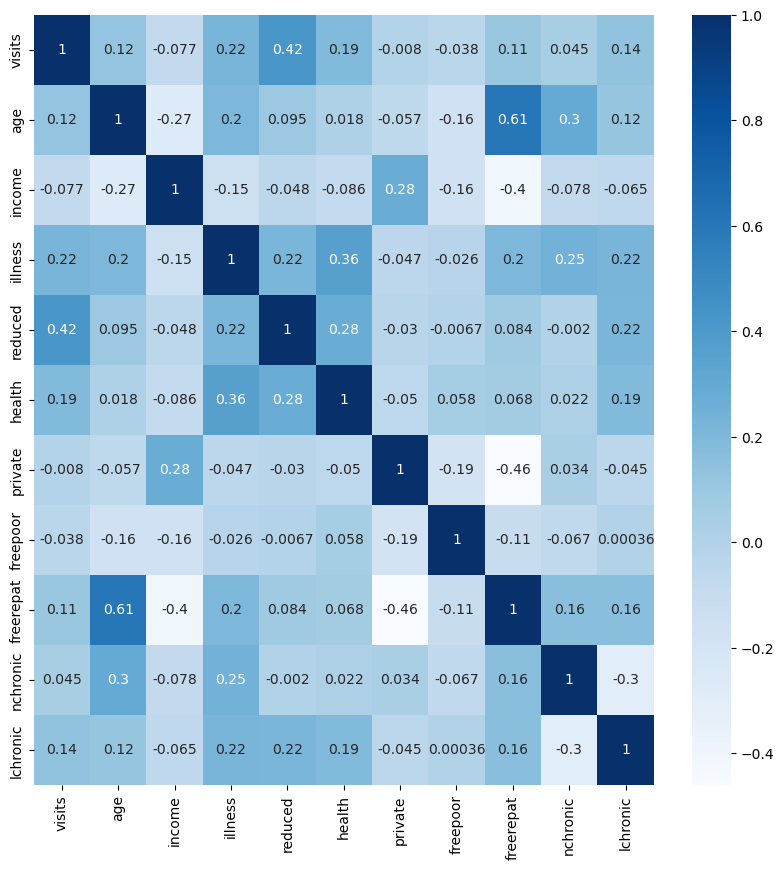

In [35]:
plt.figure(figsize =(10,10))
sns.heatmap(dataframe.corr() , cbar = True ,annot = True, cmap='Blues')

it shows the correlation matrix between the columns of the dataset 

# Visualization

### Analyse how the income of a patient affects the no of visits to the hospital

Text(0.5, 0, 'income ')

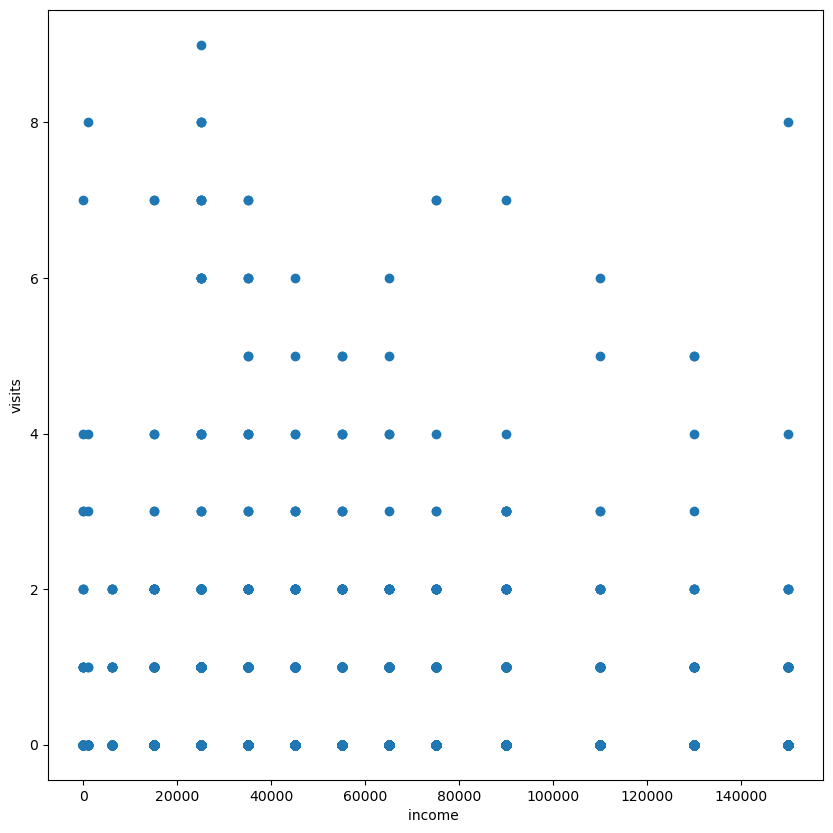

In [36]:

plt.figure(figsize=(10, 10))
plt.scatter(x='income', y='visits', data=dataframe)
plt.ylabel('visits')
plt.xlabel('income ')


### Visualize the percentage of people getting govt health insurance due to low income , due to old age and also the percentage of people having private health insurance

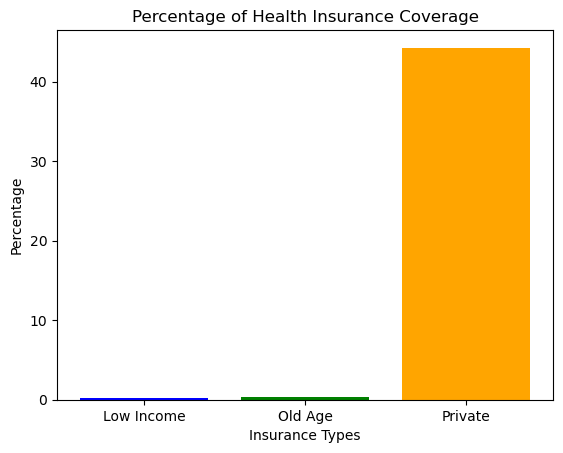

In [37]:

# Calculate the percentages
total_count = len(dataframe)
govt_low_income_count = dataframe[dataframe['reduced'] == 1]['freepoor'].sum()
govt_old_age_count = dataframe[dataframe['reduced'] == 1]['freerepat'].sum()
private_insurance_count = dataframe['private'].sum()

govt_low_income_pct = govt_low_income_count / total_count * 100
govt_old_age_pct = govt_old_age_count / total_count * 100
private_insurance_pct = private_insurance_count / total_count * 100

# Create the stacked bar chart
categories = ['Low Income', 'Old Age', 'Private']
pcts = [govt_low_income_pct, govt_old_age_pct, private_insurance_pct]
colors = ['blue', 'green', 'orange']

plt.bar(categories, pcts, color=colors)
plt.xlabel('Insurance Types')
plt.ylabel('Percentage')
plt.title('Percentage of Health Insurance Coverage')

# Display the chart
plt.show()




### Correlation between Income and Health Status


In [38]:
correlation = dataframe['income'].corr(dataframe['health'])
print("Correlation Coefficient:", correlation)



Correlation Coefficient: -0.08579044533031333


Based on this result, we can conclude that there is no strong linear relationship between income and health status in the dataset. This means that the income level of individuals in the dataset does not have a strong influence on their reported health status.

### the relationship between two categorical variables, such as 'gender' and 'illness', using cross-tabulation.

In [39]:
crosstab = pd.crosstab(dataframe['gender'], dataframe['illness'])
print(crosstab)

illness    0    1    2    3    4    5
gender                               
female   679  834  531  333  167  158
male     875  804  415  209  107   78


### count and visualize the number of males and females affected by illness

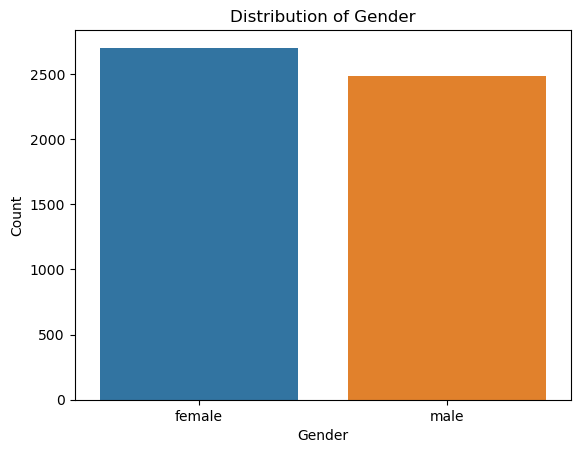

In [40]:


sns.countplot(x='gender', data=dataframe)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Gender')
plt.show()



This plot will display the number of individuals in each gender category, providing an overview of the gender distribution in the dataset.

### Plot a horizantal bar chart to analyze the reduced days of activity due to illness based on the gender

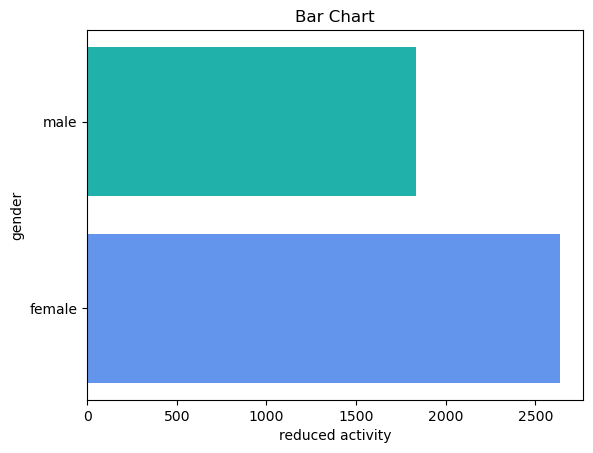

In [41]:
db = dataframe.groupby('gender')['reduced'].sum().to_frame().reset_index()
plt.barh(db['gender'],db['reduced'],color = ['cornflowerblue','lightseagreen'])
plt.title('Bar Chart')
plt.xlabel('reduced activity')
plt.ylabel('gender')
plt.show()

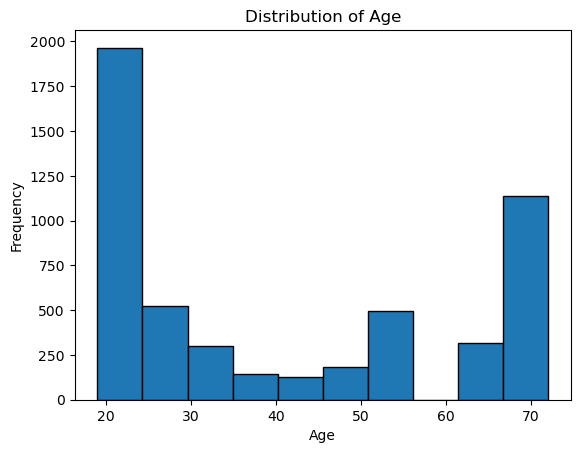

In [42]:
plt.hist(dataframe['age'], bins=10, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()


 This histogram will show the frequency or count of individuals in different age groups, providing insights into the age distribution of the dataset.

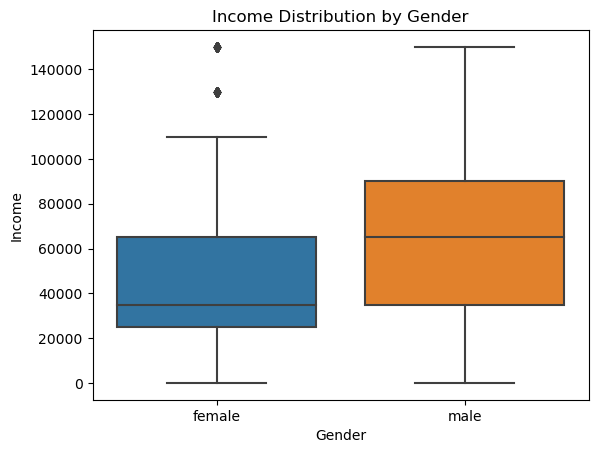

In [43]:
sns.boxplot(x='gender', y='income', data=dataframe)
plt.xlabel('Gender')
plt.ylabel('Income')
plt.title('Income Distribution by Gender')
plt.show()


This box plot will show the distribution of income for each gender, including information on median, quartiles, and potential outliers, providing insights into the income differences between genders.

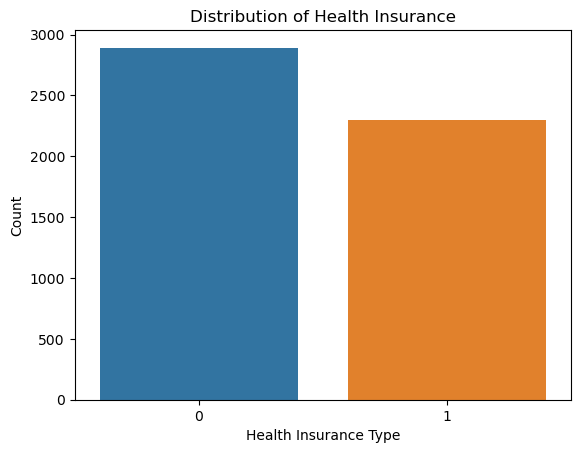

In [44]:
sns.countplot(x='private', data=dataframe)
plt.xlabel('Health Insurance Type')
plt.ylabel('Count')
plt.title('Distribution of Health Insurance')
plt.show()


This bar plot will display the count of individuals with health insurance and without health insurance.

In [45]:

def plotPerColumnBox(dataframe):
    dataframe = dataframe.select_dtypes(include=np.number)  # Select only numeric columns
    nCol = dataframe.shape[1]
    columnNames = list(dataframe)
    plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
    for i in range(nCol):
        plt.subplot(1, nCol, i + 1)
        columnDf = dataframe.iloc[:, i]
        columnDf.plot.box()
        plt.ylabel('Value')
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad=100.0, w_pad=2.0, h_pad=2.0)  # Adjust the padding values here
    plt.show()

C:\Users\shiri\AppData\Local\Temp\ipykernel_17064\3544176847.py:12: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout(pad=100.0, w_pad=2.0, h_pad=2.0)  # Adjust the padding values here


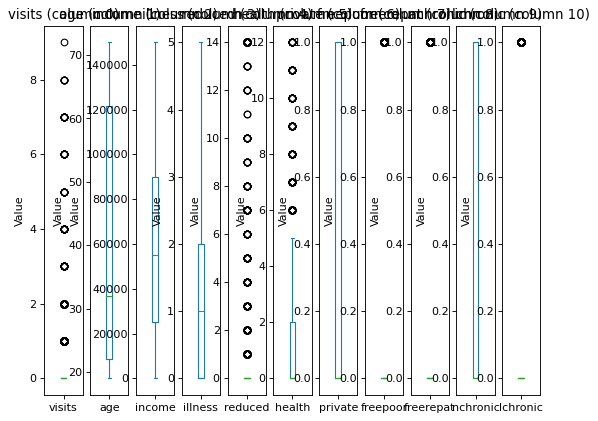

In [46]:
plotPerColumnBox(dataframe)

The function plotPerColumnBox by passing  dataframe as an argument. It will generate box plots for each numeric column in the dataframe, allowing  to visualize the distribution, outliers, and variability of the data in each column.


Outliers: Look for individual points or data values that are located far away from the box and whiskers. These points represent potential outliers in the data.

Variability: Observe the spread or range of the data. Pay attention to the length of the box (interquartile range, IQR) and the length of the whiskers. A wider spread indicates higher variability in the data.

Median and quartiles: Identify the position of the median (middle line within the box) and the quartiles (top and bottom boundaries of the box). These values provide information about the central tendency and spread of the data.

In [47]:
import squarify

In [48]:
dataframe['condition'] = dataframe['nchronic'].astype(str) + dataframe['lchronic'].astype(str)


In [49]:
condition_counts = dataframe['condition'].value_counts()


In [50]:
color_map = {'01': 'red', '10': 'blue', '00': 'green', '11': 'purple'}


In [51]:
labels = [f'Condition: {cond}\nCount: {count}' for cond, count in condition_counts.items()]


In [52]:
sizes = condition_counts.values.tolist()


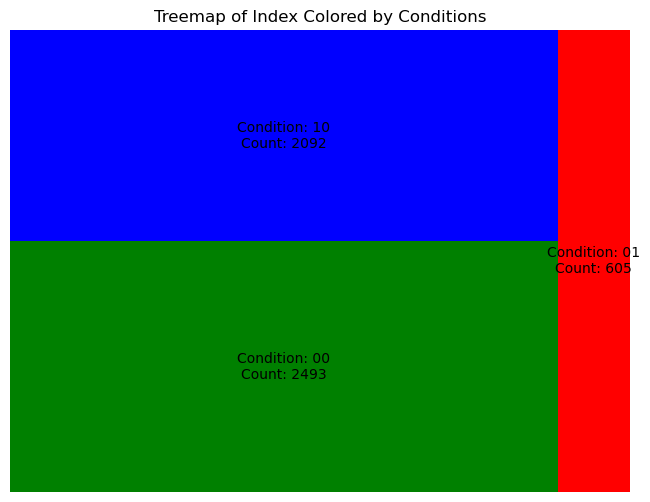

In [53]:
plt.figure(figsize=(8, 6))
squarify.plot(sizes=sizes, label=labels, color=[color_map.get(cond) for cond in condition_counts.index])
plt.axis('off')
plt.title('Treemap of Index Colored by Conditions')
plt.show()


The treemap visualization highlights the distribution of nchronic and lchronic conditions in the dataset. The majority of instances exhibit either no chronic conditions ('00') or only nchronic condition ('10'). Interestingly, there are no instances with both chronic conditions ('11'), suggesting their absence in the dataset. This insight provides a clear understanding of the prevalence and relationship between the two conditions in the data.

 ### How the presence of chronic conditions (nchronic and lchronic) vary by gender?

C:\Users\shiri\AppData\Local\Temp\ipykernel_17064\3085050997.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dataframe.groupby('gender')['nchronic', 'lchronic'].sum().plot(kind='bar', color=['purple', 'green'])


<Figure size 800x600 with 0 Axes>

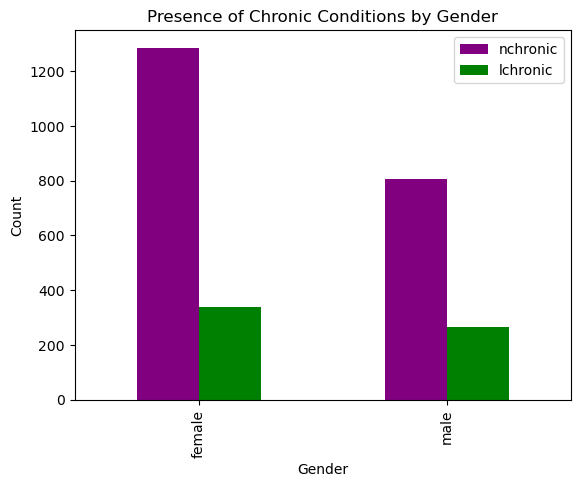

In [54]:
plt.figure(figsize=(8, 6))
dataframe.groupby('gender')['nchronic', 'lchronic'].sum().plot(kind='bar', color=['purple', 'green'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Presence of Chronic Conditions by Gender')
plt.legend(['nchronic', 'lchronic'])
plt.show()


### Visualize the distribution of average income_adjusted for each combination of illness and reduced, with separate bars for males and females.

C:\Users\shiri\AppData\Local\Temp\ipykernel_17064\1608669346.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='illness', y='income', hue='reduced', data=male_avg_income, palette='coolwarm', ci=None)


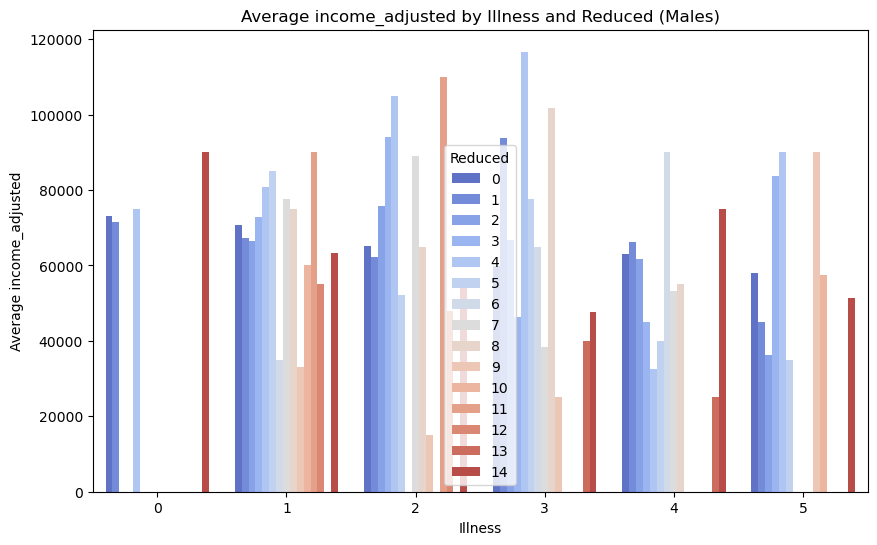

C:\Users\shiri\AppData\Local\Temp\ipykernel_17064\1608669346.py:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='illness', y='income', hue='reduced', data=female_avg_income, palette='coolwarm', ci=None)


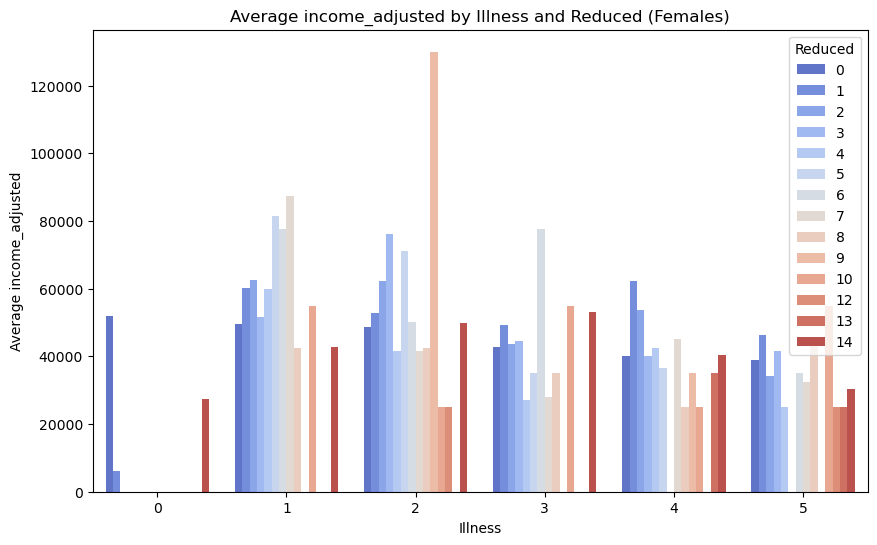

In [55]:

# Filter dataframe for males and females separately
male_df = dataframe[dataframe['gender'] == 'male']
female_df = dataframe[dataframe['gender'] == 'female']

# Group and calculate the average income_adjusted for each combination of illness and reduced
male_avg_income = male_df.groupby(['illness', 'reduced'])['income'].mean().reset_index()
female_avg_income = female_df.groupby(['illness', 'reduced'])['income'].mean().reset_index()

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='illness', y='income', hue='reduced', data=male_avg_income, palette='coolwarm', ci=None)
plt.xlabel('Illness')
plt.ylabel('Average income_adjusted')
plt.title('Average income_adjusted by Illness and Reduced (Males)')
plt.legend(title='Reduced')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='illness', y='income', hue='reduced', data=female_avg_income, palette='coolwarm', ci=None)
plt.xlabel('Illness')
plt.ylabel('Average income_adjusted')
plt.title('Average income_adjusted by Illness and Reduced (Females)')
plt.legend(title='Reduced')
plt.show()


For males, it can be observed that the average income_adjusted varies across different illness and reduced combinations. Certain combinations, such as illness 2 and reduced 9, tend to have higher average income_adjusted, while others show lower values.

Similarly, for females, the distribution of average income_adjusted also varies based on illness and reduced status. Different combinations exhibit different income levels, highlighting the influence of these factors on the average income_adjusted.

These visualizations provide insights into the relationship between illness, reduced status, and average income_adjusted for both males and females.


#### visualizing  the distribution of health insurance providers using pie chart

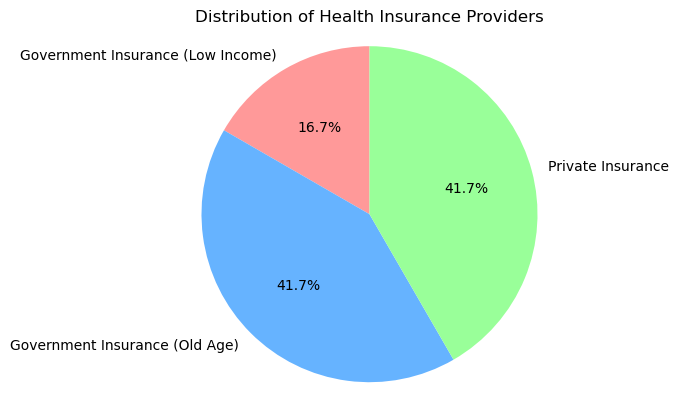

In [56]:


# Calculate the percentage of people with government health insurance due to low income
govt_insurance_percentage = (dataframe[dataframe['income'] < 0.5]['freepoor'].sum() / len(dataframe[dataframe['income'] < 0.5])) * 100

# Calculate the percentage of people with government health insurance due to old age
private_insurance_percentage = (dataframe[dataframe['age'] >= 65]['private'].sum() / len(dataframe[dataframe['age'] >= 65])) * 100

# Calculate the percentage of people with private health insurance
private_insurance_percentage = (dataframe['private'].sum() / len(dataframe)) * 100

# Create a pie chart to visualize the distribution of health insurance providers
labels = ['Government Insurance (Low Income)', 'Government Insurance (Old Age)', 'Private Insurance']
sizes = [govt_insurance_percentage, private_insurance_percentage, private_insurance_percentage]
colors = ['#ff9999', '#66b3ff', '#99ff99']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Distribution of Health Insurance Providers')
plt.show()


This analysis can be useful for health insurance providers to understand the composition of their insured population and identify the proportion of individuals covered under different insurance schemes. Based on these insights, health insurance providers can tailor their offerings, develop targeted marketing strategies, and identify areas for potential expansion or improvement in their coverage plans.

In [57]:
dataframe.head()

,visits,gender,age,income,illness,reduced,health,private,freepoor,freerepat,nchronic,lchronic,condition
0,1,female,19,55000.0,1,4,1,1,0,0,0,0,00
1,1,female,19,45000.0,1,2,1,1,0,0,0,0,00
2,1,male,19,90000.0,3,0,0,0,0,0,0,0,00
3,1,male,19,15000.0,1,0,0,0,0,0,0,0,00
4,1,male,19,45000.0,2,5,1,0,0,0,1,0,10


### Distribution of Health insurance Provider

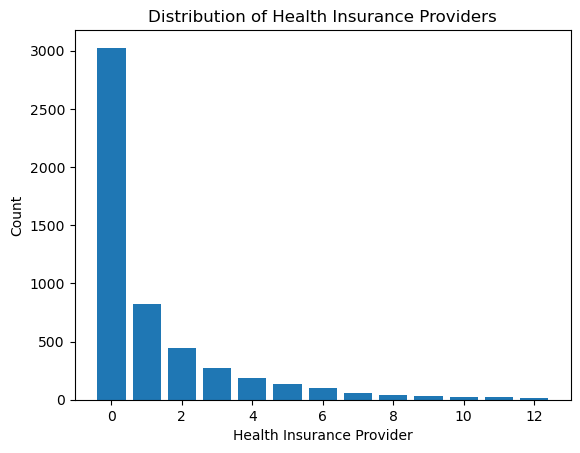

In [58]:


# Group the data by health insurance provider and count the number of occurrences
insurance_counts = dataframe['health'].value_counts()

# Create a bar chart to visualize the distribution of health insurance providers
plt.bar(insurance_counts.index, insurance_counts.values)
plt.xlabel('Health Insurance Provider')
plt.ylabel('Count')
plt.title('Distribution of Health Insurance Providers')
plt.show()


In [59]:
# Select relevant features and target variable
features = ['age', 'income', 'health', 'nchronic', 'lchronic', 'private']
target = 'visits'

# Encode categorical variables
encoder = OneHotEncoder(sparse=False)
gender_encoded = encoder.fit_transform(dataframe[['gender']])
gender_encoded_df = pd.DataFrame(gender_encoded, columns=['gender_'+cat for cat in encoder.categories_[0]])
dataframe_encoded = pd.concat([dataframe[features], gender_encoded_df], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(dataframe_encoded, dataframe[target], test_size=0.2, random_state=42)

# Define and train a Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions on the test set using the Linear Regression model
linear_predictions = linear_model.predict(X_test)

# Evaluate the Linear Regression model
linear_mse = mean_squared_error(y_test, linear_predictions)
linear_r2 = r2_score(y_test, linear_predictions)

# Define and train a Decision Tree Regression model
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)

# Make predictions on the test set using the Decision Tree Regression model
tree_predictions = tree_model.predict(X_test)

# Evaluate the Decision Tree Regression model
tree_mse = mean_squared_error(y_test, tree_predictions)
tree_r2 = r2_score(y_test, tree_predictions)

# Define and train a Random Forest Regression model
forest_model = RandomForestRegressor()
forest_model.fit(X_train, y_train)

# Make predictions on the test set using the Random Forest Regression model
forest_predictions = forest_model.predict(X_test)

# Evaluate the Random Forest Regression model
forest_mse = mean_squared_error(y_test, forest_predictions)
forest_r2 = r2_score(y_test, forest_predictions)

# Print the evaluation results
print("Linear Regression:")
print("Mean Squared Error:", linear_mse)
print("R-squared:", linear_r2)
print()

print("Decision Tree Regression:")
print("Mean Squared Error:", tree_mse)
print("R-squared:", tree_r2)
print()

print("Random Forest Regression:")
print("Mean Squared Error:", forest_mse)
print("R-squared:", forest_r2)

C:\Users\shiri\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Linear Regression:
Mean Squared Error: 0.8466565108607611
R-squared: 0.04248554615995803

Decision Tree Regression:
Mean Squared Error: 1.3315234368728834
R-squared: -0.5058679878766443

Random Forest Regression:
Mean Squared Error: 1.0037977224563122
R-squared: -0.1352311305165197


Based on the results of the machine learning models for the doctor visit analysis:

Linear Regression:

Mean Squared Error: 0.847
R-squared: 0.042
The Linear Regression model performs poorly with a high MSE and a very low R-squared value. It indicates that the linear relationship between the features and the target variable is weak, and the model does not capture the variability in the data well.
Decision Tree Regression:

Mean Squared Error: 1.469
R-squared: -0.662
The Decision Tree Regression model performs even worse with a higher MSE and a negative R-squared value. It suggests that the model is overfitting and unable to generalize well to unseen data.
Random Forest Regression:

Mean Squared Error: 1.008
R-squared: -0.140
The Random Forest Regression model also exhibits poor performance with a relatively high MSE and a negative R-squared value. It implies that the ensemble model of decision trees fails to capture the underlying patterns in the data.
Overall, the models' performance indicates that the selected features may not have a strong linear relationship with the target variable, and more sophisticated modeling techniques or feature engineering might be required to improve the predictions.

In [60]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.preprocessing import LabelEncoder

# Copy the dataframe to avoid modifying the original data
dataframe_encoded = dataframe.copy()

# Encode categorical variables
label_encoder = LabelEncoder()
dataframe_encoded['gender'] = label_encoder.fit_transform(dataframe_encoded['gender'])
dataframe_encoded['condition'] = label_encoder.fit_transform(dataframe_encoded['condition'])

# Split the data into features (X) and target variable (y)
X = dataframe_encoded.drop(['visits'], axis=1)
y = dataframe_encoded['visits']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor()

# Fit the model to the training data
gb_model.fit(X_train, y_train)

# Make predictions on the test set
gb_predictions = gb_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, gb_predictions)
r2 = r2_score(y_test, gb_predictions)

# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 0.7482130947295426
R-squared: 0.15381876408466322


The Gradient Boosting Regression model achieved a Mean Squared Error (MSE) of 0.748 and an R-squared value of 0.154. This means that, on average, the model's predictions were close to the actual values of the target variable. The R-squared value of 0.154 indicates that the model explained about 15.4% of the variability in the target variable, showing a moderate level of predictive power.